In [260]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [287]:
#read in sales
sales20 = pd.read_csv("Data/2020_manhattan.csv", header=6)
sales21 = pd.read_csv("Data/2021_manhattan.csv", header=6)
sales22 = pd.read_csv("Data/rollingsales_manhattan.csv")
sales22.rename(columns = {' SALE PRICE ':'SALE PRICE'}, inplace = True)
sales22.rename(columns = {'RESIDENTIAL UNITS':'RESIDENTIAL\nUNITS'}, inplace = True)
sales22.rename(columns = {'COMMERCIAL UNITS':'COMMERCIAL\nUNITS'}, inplace = True)
sales22.rename(columns = {'TOTAL UNITS':'TOTAL \nUNITS'}, inplace = True)
sales22.rename(columns = {'LAND SQUARE FEET':'LAND \nSQUARE FEET'}, inplace = True)
sales22.rename(columns = {'GROSS SQUARE FEET':'GROSS \nSQUARE FEET'}, inplace = True)
sales22.rename(columns = {'BUILDING CLASS AT TIME OF SALE':'BUILDING CLASS\nAT TIME OF SALE'}, inplace = True)

In [288]:
print(sales20.head(2))
print(sales21.head(2))
print(sales22.head(2))

   BOROUGH   NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      NaN            NaN                      NaN                  NaN   
1      1.0  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   

   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT       ADDRESS  \
0    NaN   NaN        NaN                       NaN           NaN   
1  377.0  72.0        NaN                        B9  231 EAST 7TH   

  APARTMENT NUMBER  ...  RESIDENTIAL\nUNITS COMMERCIAL\nUNITS  TOTAL \nUNITS  \
0              NaN  ...                 NaN               NaN            NaN   
1              NaN  ...                   2               0.0              2   

  LAND \nSQUARE FEET GROSS \nSQUARE FEET YEAR BUILT  \
0                NaN                 NaN        NaN   
1              1,718               5,154     1901.0   

   TAX CLASS AT TIME OF SALE  BUILDING CLASS\nAT TIME OF SALE SALE PRICE  \
0                        NaN                              NaN        NaN   
1      

In [289]:
allsales = pd.concat((sales20, sales21, sales22), axis=0)

In [290]:
allsales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE,EASEMENT,City,State,Country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.0,72.0,NaN,B9,231 EAST 7TH,NaN,...,"5,154",1901.0,1.0,B9,0,10/2/2020,NaN,NaN,NaN,NaN
2,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,"3,084",1899.0,1.0,C0,0,10/31/2020,NaN,NaN,NaN,NaN
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,"3,084",1899.0,1.0,C0,"4,350,000",7/16/2020,NaN,NaN,NaN,NaN
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372.0,10.0,NaN,C7,274 EAST 3RD,NaN,...,"6,445",1900.0,2.0,C7,0,12/27/2020,NaN,NaN,NaN,NaN


In [291]:
allsales.dtypes

BOROUGH                            float64
NEIGHBORHOOD                        object
BUILDING CLASS CATEGORY             object
TAX CLASS AT PRESENT                object
BLOCK                              float64
LOT                                float64
EASE-MENT                          float64
BUILDING CLASS AT PRESENT           object
ADDRESS                             object
APARTMENT NUMBER                    object
ZIP CODE                           float64
RESIDENTIAL\nUNITS                  object
COMMERCIAL\nUNITS                  float64
TOTAL \nUNITS                       object
LAND \nSQUARE FEET                  object
GROSS \nSQUARE FEET                 object
YEAR BUILT                         float64
TAX CLASS AT TIME OF SALE          float64
BUILDING CLASS\nAT TIME OF SALE     object
SALE PRICE                          object
SALE DATE                           object
EASEMENT                           float64
City                                object
State      

In [292]:
#drop empty rows
print(allsales.shape)
allsales = allsales.dropna(how='all', axis=0)
print(allsales.shape)

(65792, 25)
(56960, 25)


In [294]:
(65792-56960)/56960

0.1550561797752809

##### There were 56,960 home sales in 2020, 2021, and 2022 in Manhattan.
15% of the input data was empty.

In [158]:
#change layup str to int
#allsales['RESIDENTIAL\nUNITS'] = allsales['RESIDENTIAL\nUNITS'].astype(np.float64)
 #need to remove commas
#allsales['TOTAL \nUNITS'] = allsales['TOTAL \nUNITS'].astype(np.float64)
 #need to remove commas

In [295]:
#price: remove commas, change to int
prices = []
for i in allsales['SALE PRICE']:
    a = i.replace(",", "")
    a = a.replace("'", "")
    a = float(a)
    prices.append(a)
allsales['prices'] = prices

In [296]:
#date: change to datetime format
import datetime
date = []
for i in allsales['SALE DATE']:
    b = datetime.datetime.strptime(i, "%m/%d/%Y")
    date.append(b)
allsales['realdate'] = date

#add month for viz
month = []
for i in allsales['realdate']:
    c = i.month
    month.append(c)
allsales['month'] = month

#add year for viz
year = []
for i in allsales['realdate']:
    d = i.year
    year.append(d)
allsales['year'] = year

C:\Users\lproc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


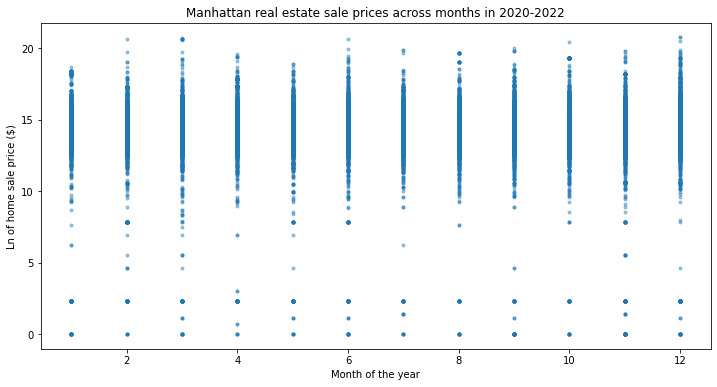

In [311]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(allsales.month, np.log(allsales.prices), marker='.', alpha=0.4, cmap='coolwarm')
plt.xlabel("Month of the year")
plt.ylabel("Ln of home sale price ($)")
plt.title("Manhattan real estate sale prices across months in 2020-2022")
plt.savefig("months.png")
plt.show()

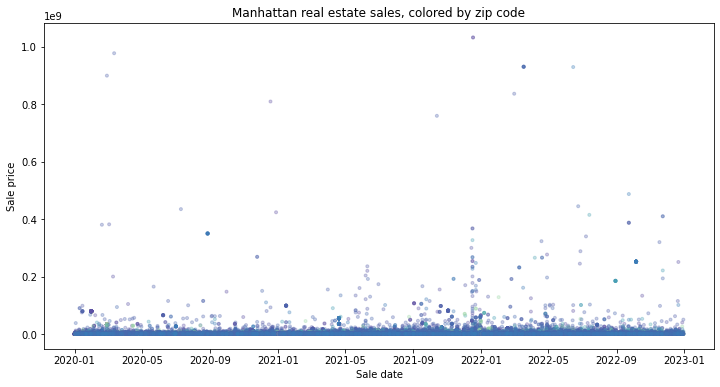

In [322]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(allsales.realdate, allsales.prices, c=allsales['ZIP CODE'], marker='.', alpha=0.3, cmap='Spectral_r')
plt.xlabel("Sale date")
plt.ylabel("Sale price")
plt.title("Manhattan real estate sales, colored by zip code")
plt.savefig("zipcolors.png")
plt.show()

In [300]:
allsales.prices.describe()

count    5.696000e+04
mean     3.200661e+06
std      1.969748e+07
min      0.000000e+00
25%      4.010000e+05
50%      9.150000e+05
75%      2.100000e+06
max      1.033000e+09
Name: prices, dtype: float64

In [326]:
allsales[['BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'prices']].describe()

,BLOCK,LOT,ZIP CODE,YEAR BUILT,TAX CLASS AT TIME OF SALE,prices
count,56960.000000,56960.000000,56960.000000,50946.000000,56960.000000,5.696000e+04
mean,1097.123754,753.430337,10030.151106,1955.444176,2.091397,3.200661e+06
std,523.748439,906.249457,37.905708,38.789960,0.483586,1.969748e+07
min,5.000000,1.000000,10001.000000,1111.000000,1.000000,0.000000e+00
25%,740.000000,29.000000,10013.000000,1923.000000,2.000000,4.010000e+05
50%,1158.000000,1003.000000,10022.000000,1957.000000,2.000000,9.150000e+05
75%,1446.000000,1205.000000,10028.000000,1987.000000,2.000000,2.100000e+06
max,2250.000000,9116.000000,10463.000000,2022.000000,4.000000,1.033000e+09


Text(0, 0.5, 'Ln of sale price')

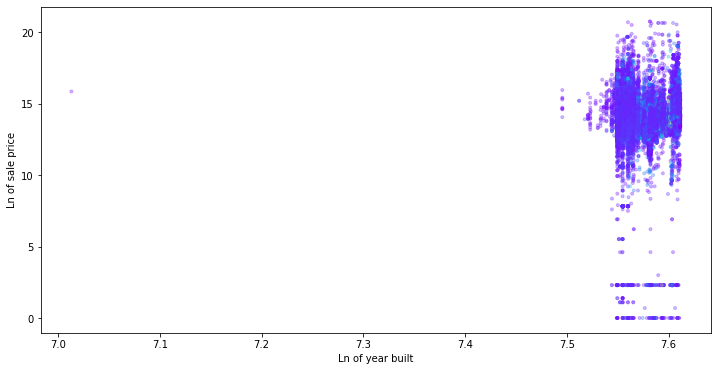

In [334]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.scatter(np.log(allsales['YEAR BUILT']), np.log(allsales['prices']), marker='.', alpha=0.3, c=allsales['ZIP CODE'], cmap='rainbow')
plt.xlabel("Ln of year built")
plt.ylabel("Ln of sale price")

In [21]:
#read in PAD to map to sales
#file = open("Data/bobaadr.txt", "r")
#lines = file.read().split(',')
#print(lines[:20]) #need to remove " and '